<a id='top'></a>

# CSCI3022 S21
# Homework 2: Data Wrangling and Visualizations
***

**Name**: Chirag Telang

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [9]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [11]:
survived = df.loc[df['Survived'] == 1]
totalS = len(survived.index)

totalP = len(df.PassengerId)


print("Probability of Survival (Overall Passengers): ", totalS/totalP)
#print(totalS)
#print(totalP)

Probability of Survival (Overall Passengers):  0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

If there were class warfare, you would predict that the class 1 passengers would assert their privilege over the lower classes -- resulting in the survival of more class 1 passengers. If there was chivalry, women would have higher survival rates than men. These two hypotheses are not mutually exclusive.

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [13]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [15]:
for pClass in [1,2,3]:
    for sex in ["male", "female"]:
        survivedTotal = dfTitanic.loc[(dfTitanic["Pclass"]==pClass) & (dfTitanic["Sex"]==sex), "Survived"].sum()
        totalPass = len(dfTitanic.loc[(dfTitanic["Pclass"]==pClass) & (dfTitanic["Sex"]==sex), "Survived"])
        print("Class {} {} Survival Probability: {}\n".format(pClass, sex, survivedTotal/totalPass))

for pClass in [1,2,3]:
    survivedTotal = dfTitanic.loc[(dfTitanic["Pclass"]==pClass), "Survived"].sum()
    totalPass = len(dfTitanic.loc[(dfTitanic["Pclass"]==pClass), "Survived"])
    print("Class {} Survival Probability: {}".format(pClass, survivedTotal/totalPass))

Class 1 male Survival Probability: 0.3870967741935484

Class 1 female Survival Probability: 0.96

Class 2 male Survival Probability: 0.1839080459770115

Class 2 female Survival Probability: 0.9310344827586207

Class 3 male Survival Probability: 0.13780918727915195

Class 3 female Survival Probability: 0.5254237288135594

Class 1 Survival Probability: 0.6428571428571429
Class 2 Survival Probability: 0.4827586206896552
Class 3 Survival Probability: 0.2518703241895262


* **(i)** Compared to the base survival probability results from **Part A**, Class 1 and Class 2 have a higher survival probability, while Class 3 has a lower survival probability.
* **(ii)** Comparde to the base survival probability results from **Part A**, male survivor rates are either around the same proability or lower and women survival rates are significantly higher in all cases.
* **(iii)** Females were more likely to survive than males regardless of passenger class.
* **(iv)**  Women in the third class had a slightly higher survival probability.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

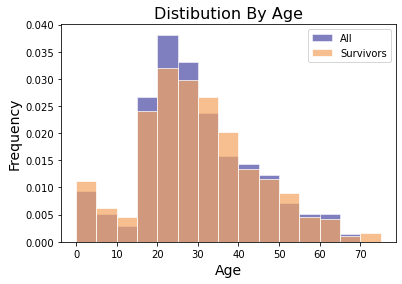

In [73]:
my_bins = range(0,80,5)
df_surv = df.loc[df['Survived'] == 1]
df1 = df['Age']
df2 = df_surv['Age']
plt.hist(df2, bins=my_bins, alpha = 0.5, density = 1, stacked=True, color = "navy", edgecolor="white")
plt.hist(df1, bins=my_bins, alpha = 0.7, density = 1, stacked=True, color = "sandybrown", edgecolor="white")
plt.title('Distibution By Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(['All', 'Survivors'])

plt.show()

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

It would be misleading for us to have plotted these as *frequency* histograms instead because there are a larger quantity of passengers who did not survive, so, as a result, the frequency histogram for that set would have more area compared to the histogram for passengers who survived.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

Looking at the data, class 1 passengers were much more likely to survive as compared to the other lower classes. However, women were also much more likely to survive than men -- which suggests some evidence of male chivalry (making sure that the women got off the boat first). In regards to age, young adults were more likely to survive, while adults in their 30s were more likely to not survive -- illustrating some evidence of age bias towards the younger population of passengers. Therefore, based on the data, it seems like there was some combination of all three of these characteristics.

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2: Data (Box Plots and Outliers)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [16]:
dfPrecip = pd.read_csv("boulder_precip_12021.csv")
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2021 isn't over yet!  We have one row at the bottom that isn't fully complete and blank values are filling the months that haven't happened yet.  This can wreak havoc on some of our methods!  **Drop** the 2021 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric! (see `df.dtypes`)

In [17]:
dfPrecip.replace("Tr", float(0), inplace=True)
dfPrecip.replace("NA", float(0), inplace=True)
dfPrecip.replace("NaN", float(0), inplace=True)
dfPrecip.replace(np.nan, float(0), inplace=True)
dfPrecip.replace("1.04*", "1.04", inplace=True)
dfPrecip.replace("1.32*", "1.32", inplace=True)

for column in dfPrecip.columns:
    dfPrecip[column] = dfPrecip[column].astype(str).str.replace('*', '')

dfPrecip.drop(dfPrecip.index[121])

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0.0,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,0.37,1.44,3.84,3.34,2.01,2.37,0.61,1.06,0.45,0.38,0.47,0.91,17.25
117,2017,1.41,0.73,1.45,3.15,6.29,0.45,1.3,1.62,1.92,2.42,0.57,0.68,21.89
118,2018,0.74,1.04,2.23,1.35,4.76,1.82,1.84,0.24,1.02,2.68,1.19,0.34,19.01
119,2019,1.57,0.74,2.83,1.87,3.89,2.12,2.21,0.10,0.56,2.42,2.38,0.35,21.04


In [18]:
dfPrecip = dfPrecip.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
dfPrecip['YEAR TOTAL'] = pd.to_numeric(dfPrecip['YEAR TOTAL'], downcast="float")

**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

<AxesSubplot:>

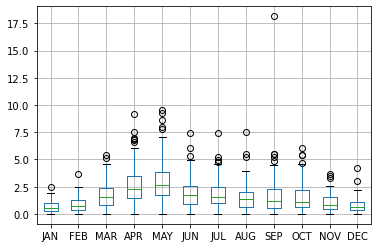

In [19]:
df_Float = dfPrecip.astype(float)
boxplot = df_Float.drop(columns = ["Year","YEAR TOTAL"])
boxplot.boxplot()


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

<AxesSubplot:>

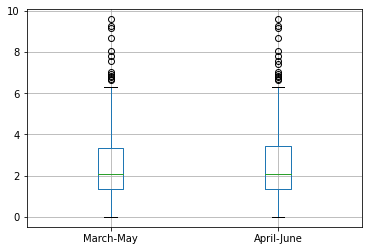

In [20]:
boxplotNew = df_Float.drop(columns = ["Year","YEAR TOTAL"])

springGroup1 = boxplotNew['MAR'].tolist() + boxplotNew['APR'].tolist() + boxplotNew['MAY'].tolist()
springGroup2 = boxplotNew['APR'].tolist() + boxplotNew['MAY'].tolist() +boxplotNew['JUN'].tolist()

boxplotNew = pd.DataFrame({'March-May': springGroup1, 'April-June':springGroup2})
boxplotNew.boxplot()

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [21]:
springFirst = df_Float["MAR"] + df_Float["APR"] + df_Float["MAY"]
springSecond = df_Float["APR"] + df_Float["MAY"] + df_Float["JUN"]

springFirst_mean = springFirst.mean()
springFirst_std = springFirst.std()

springSecond_mean = springSecond.mean()
springSecond_std = springSecond.std()

print("(March-May)")
print("-------------------------------------------------------------")
print("Mean: ", springFirst_mean)
print("Standard Deviation: ", springFirst_std)
print("\nTukey 5 Num Summary")
print(springFirst.describe())
print(" ")

print("\n(April-June)")
print("-------------------------------------------------------------")
print("Mean Spring (April-June): ", springSecond_mean)
print("Standard Deviation Spring (April-June): ", springSecond_std)
print("\nTukey 5 Num Summary")
print(springSecond.describe())

(March-May)
-------------------------------------------------------------
Mean:  7.4641803278688545
Standard Deviation:  2.799828164787454

Tukey 5 Num Summary
count    122.000000
mean       7.464180
std        2.799828
min        0.000000
25%        5.592500
50%        7.100000
75%        9.145000
max       16.750000
dtype: float64
 

(April-June)
-------------------------------------------------------------
Mean Spring (April-June):  7.618032786885245
Standard Deviation Spring (April-June):  2.997259254758996

Tukey 5 Num Summary
count    122.000000
mean       7.618033
std        2.997259
min        0.000000
25%        5.207500
50%        7.380000
75%        9.455000
max       19.070000
dtype: float64


Values for both month spans are very similar, with the means and standard deviations only having a roughly 0.2 point difference. Additionally, regardless of month, it seems as though the medians as well as the quartiles hardly change. In regards to favoring one group over the other, since both groupings have similar data, there shouldn't be many reasons to prefer one over the other. However, the second grouping does overlap months with the first, so one may choose the first grouping for less variance.   

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

<AxesSubplot:>

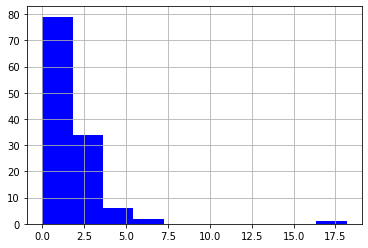

In [22]:
septValues = df_Float["SEP"]
septHist = septValues.hist(label = 'September', color = 'blue')
septHist


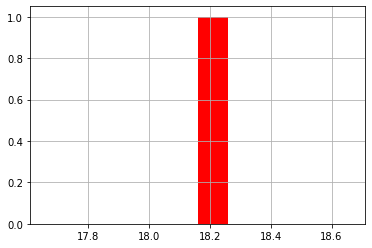

In [23]:
values2013 = df_Float[df_Float.Year == 2013]
sept2013Values = values2013['SEP']
septHist2 = sept2013Values.hist(label = 'September2013', color = 'red')

The density histogram of the September precipitation is unimodal, and skewed to the left. As for outliers, this histogram has one outlier at around 17.5 inches.  

**Part F:** That one data point in September 2013 is pretty out there!  Compute the mean and standard deviation of the September precipitation values, then compute them again while excluding the 2013 observation.  How much did each change?

If someone were to ask you about the average weather in September, what would you respond?



In [24]:
print("Sept. 2013 Mean:", np.mean(dfPrecip['SEP'].astype(float)))
print("Sept. 2013 STD:", np.std(dfPrecip['SEP'].astype(float)))
print("\n")

print("Sept. 2013 Dropped Mean:", np.mean(dfPrecip[dfPrecip['Year'] != '2013']['SEP'].astype(float)))
print("Sept. 2013 Dropped STD:", np.std(dfPrecip[dfPrecip['Year'] != '2013']['SEP'].astype(float)))

Sept. 2013 Mean: 1.6745901639344258
Sept. 2013 STD: 1.964788040769068


Sept. 2013 Dropped Mean: 1.5383471074380162
Sept. 2013 Dropped STD: 1.2758179014000999


The difference in value from the September 2013 Mean to the September 2013 with the dropped value was about 0.04 inches. The difference in value from the September 2013 standard deviation to the September 2013 with the dropped value was about 0.69 inches. If someone were to ask about the average weather in September, I would way it was a fairly rainy moth -- with an average of almost 2 inches of rain per day. 

[Back to top](#top)